# Clustering Interpretation with Decision Trees

In [41]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [42]:
path="https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Customer-Personality-Analysis-2.0/main/Data/Clustered%20Data/Clustered_Data(GMM).csv?token=GHSAT0AAAAAACL3VCJAVK6EWL5KIPJ7766OZRJINLA"
df = pd.read_csv(path)

In [43]:
df.shape

(2234, 64)

In [44]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [45]:
# Check for missing values
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())

ID                         0
Year_Birth                 0
Income                     0
Kidhome                    0
Teenhome                   0
                          ..
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
Cluster                    0
Length: 64, dtype: int64
ID                         0
Year_Birth                 0
Income                     0
Kidhome                    0
Teenhome                   0
                          ..
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
Cluster                    0
Length: 64, dtype: int64


In [46]:
# Separate features and target variable
# X = df.drop(['ID', 'Clusters'], axis=1)  # drop the ID and Clusters column
# y = df['Clusters']
X = df.drop(['ID', 'Cluster'], axis=1)  # drop the ID and Clusters column
y = df['Cluster']

# Split the data into training and testing sets for validation purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00       118
           2       1.00      0.50      0.67         2
           3       0.90      1.00      0.95         9
           4       0.99      0.98      0.98        81

    accuracy                           0.99       447
   macro avg       0.98      0.90      0.92       447
weighted avg       0.99      0.99      0.99       447



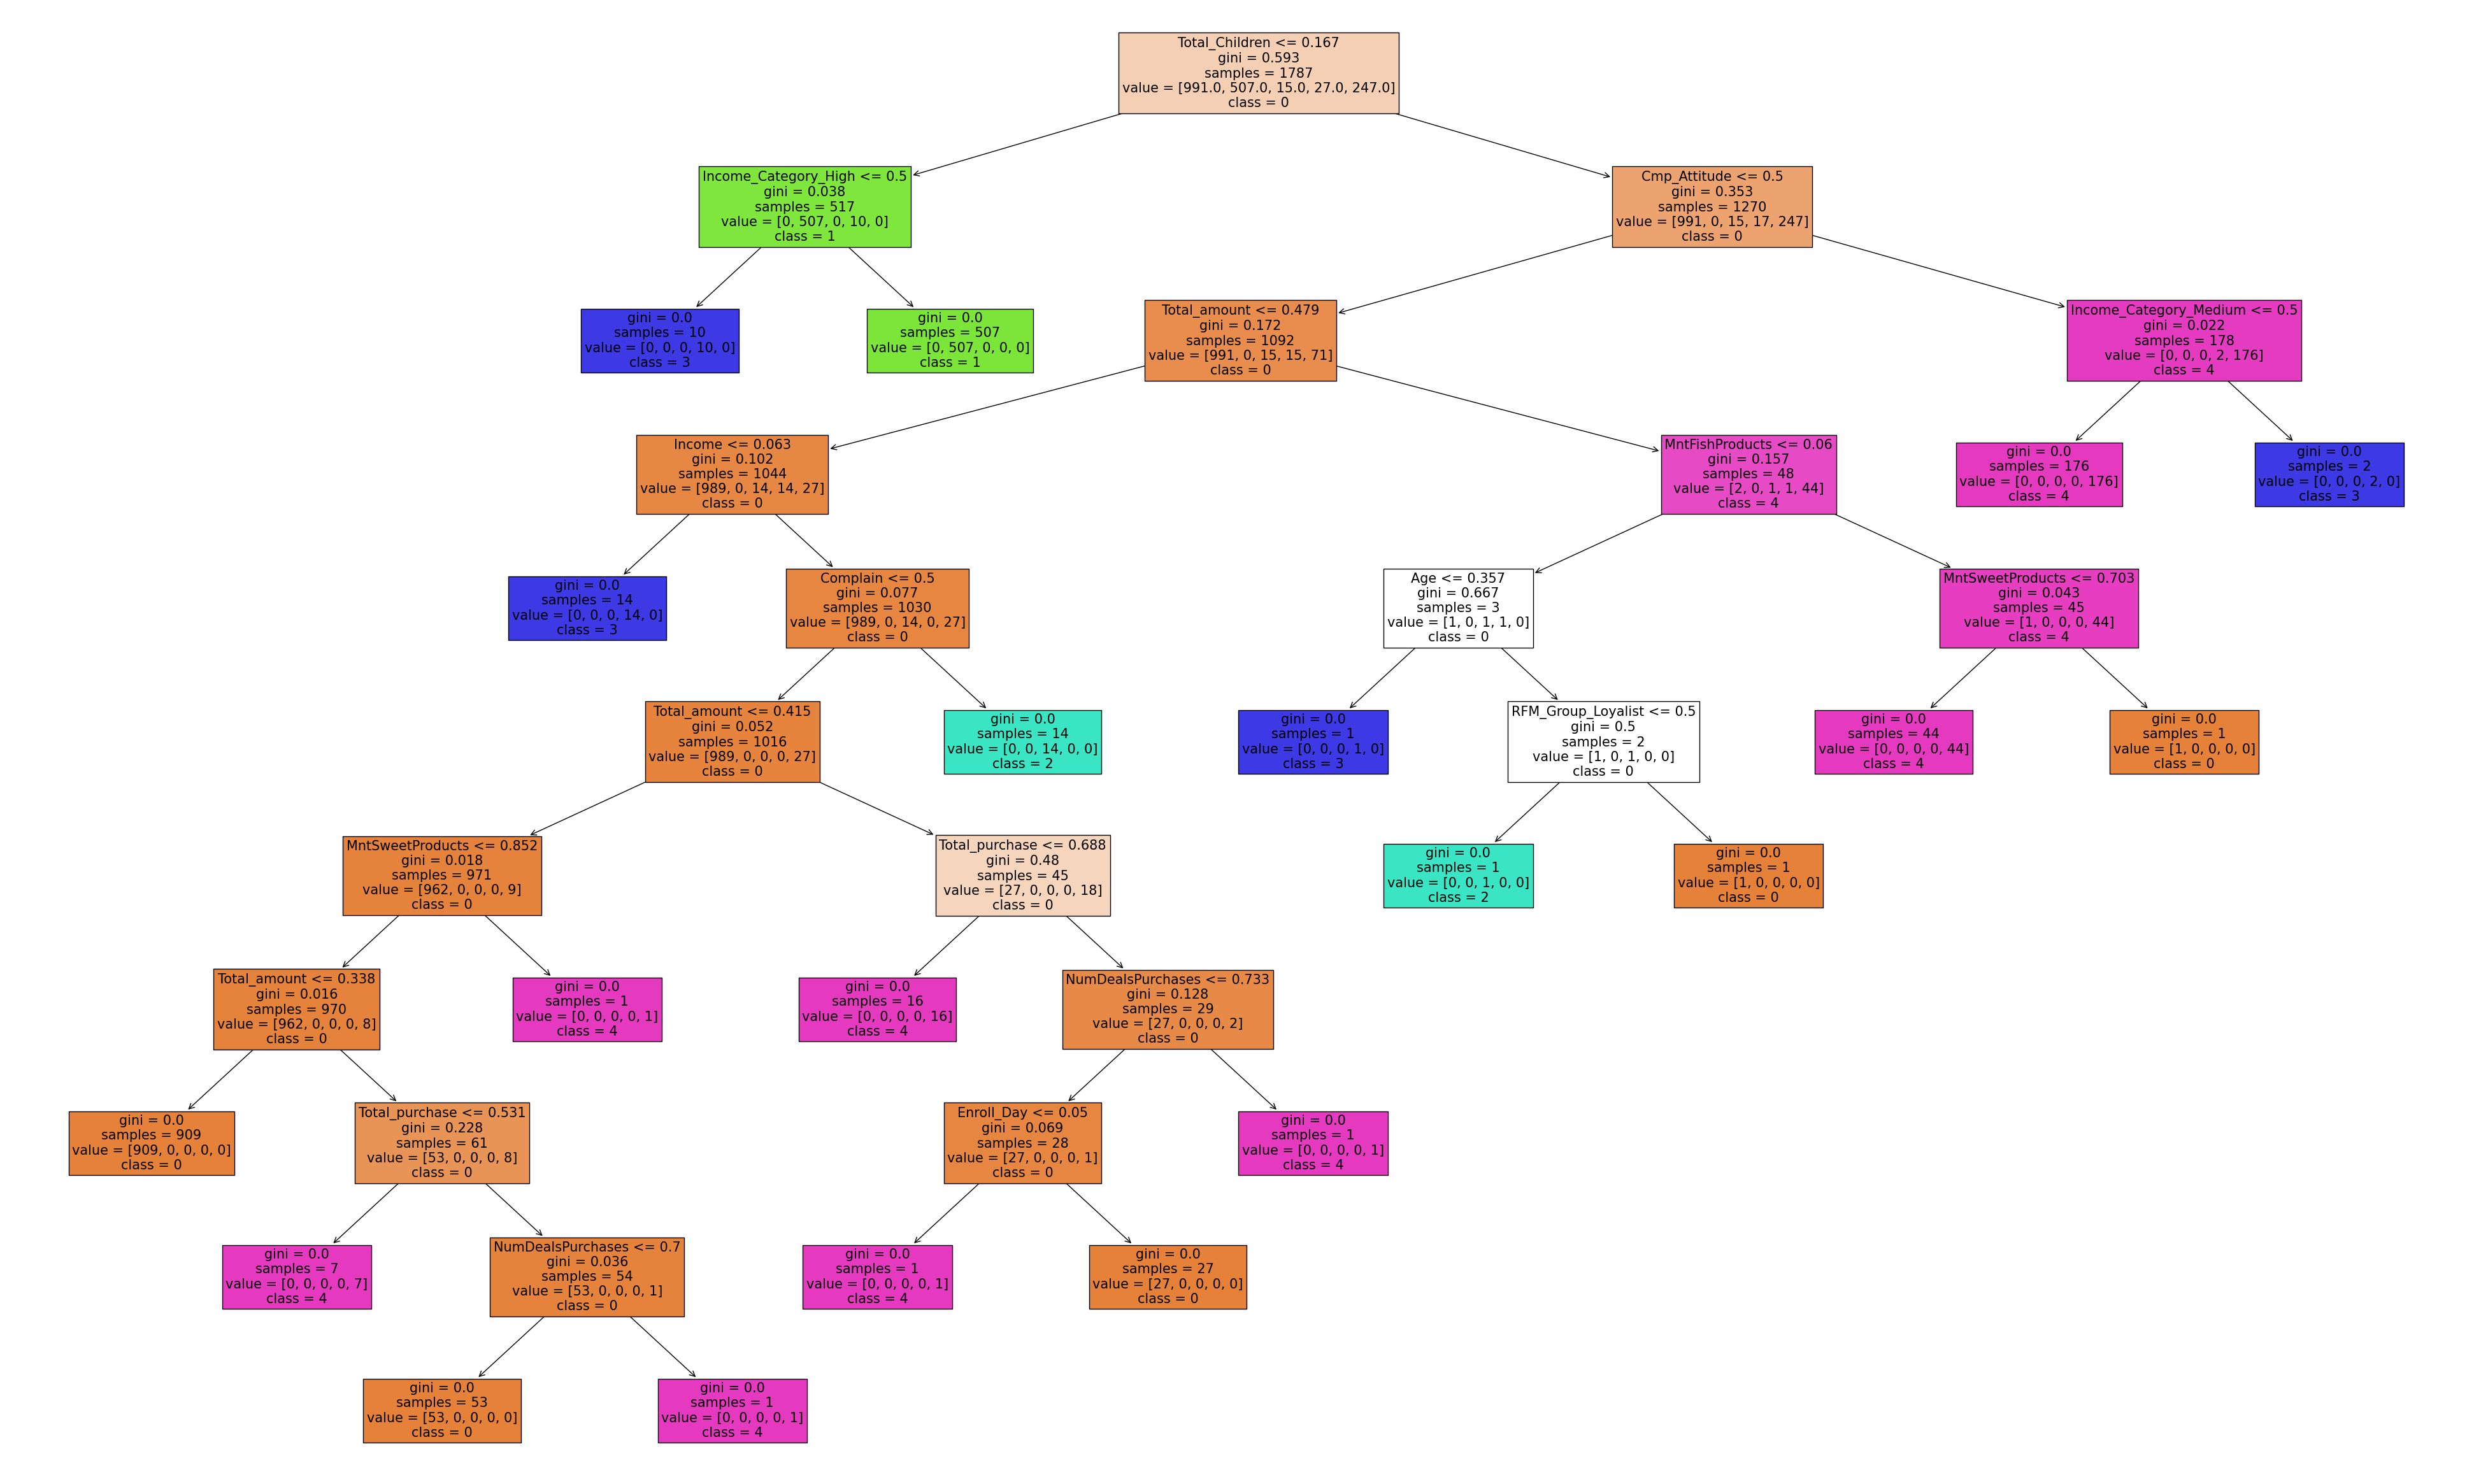

In [47]:
# Training the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = clf.predict(X_test_scaled)

# Printing the classification report
print(classification_report(y_test, y_pred))

# Convert class names to string explicitly to avoid TypeError
class_names_str = np.unique(y).astype(str)

# Attempt to plot the decision tree again with the corrected class names
plt.figure(figsize=(50, 30))
plot_tree(clf, filled=True, fontsize=15, feature_names=X.columns, class_names=class_names_str)
plt.show()

Cross-validation scores: [0.9753915  0.99105145 0.98881432 0.98881432 0.98206278]
Mean cross-validation score: 0.9852268737271898


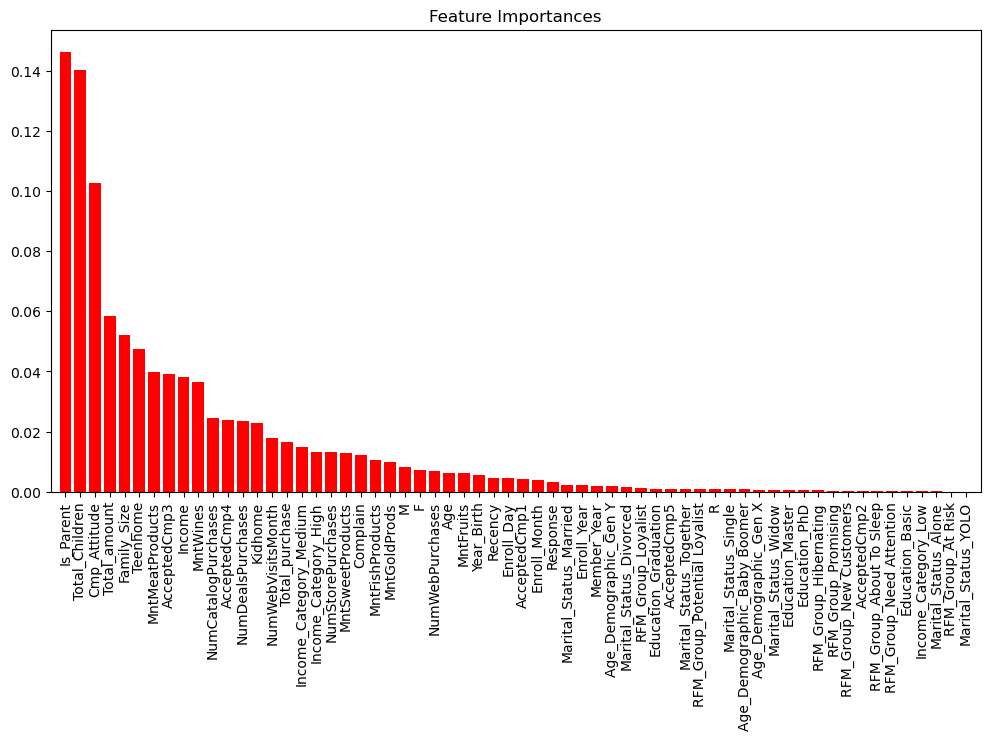

In [48]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation to assess model reliability
cv_scores = cross_val_score(rf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the Random Forest Classifier
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [49]:
# Display feature importance in table format
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display Top 10 feature importance table
feature_importance_df.head(10)

,Feature,Importance
31,Is_Parent,0.146382
30,Total_Children,0.140405
33,Cmp_Attitude,0.102747
28,Total_amount,0.058592
32,Family_Size,0.052189
3,Teenhome,0.047529
7,MntMeatProducts,0.039968
16,AcceptedCmp3,0.039108
1,Income,0.038007
5,MntWines,0.036345


Cross-validation scores: [0.99441341 0.98882682 0.9859944  0.99159664 0.99159664]
Mean cross-validation score: 0.990485579706743


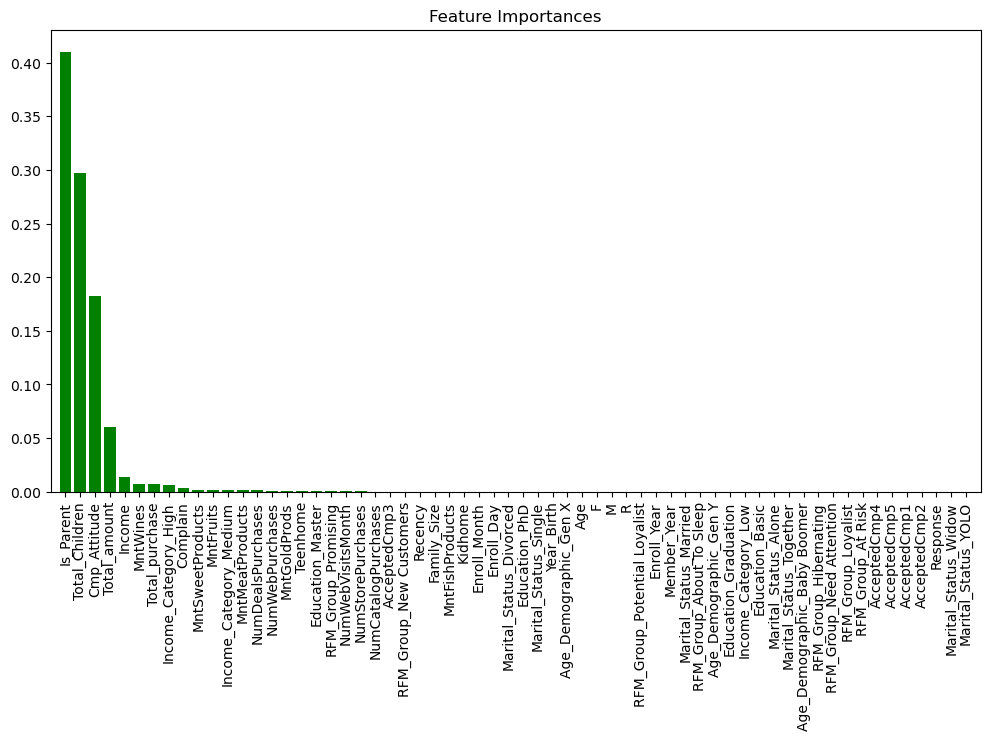

In [50]:
# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform cross-validation to assess model reliability
cv_scores = cross_val_score(gbm, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the Gradient Boosting Classifier
gbm.fit(X_train, y_train)

# Get feature importances
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [51]:
# Display feature importance in table format
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display Top 10 feature importance table
feature_importance_df.head(10)

,Feature,Importance
31,Is_Parent,0.410288
30,Total_Children,0.297565
33,Cmp_Attitude,0.182293
28,Total_amount,0.060487
1,Income,0.013782
5,MntWines,0.007137
29,Total_purchase,0.006911
48,Income_Category_High,0.006586
21,Complain,0.003835
9,MntSweetProducts,0.001889
